<a href="https://colab.research.google.com/github/yhk775206/LA2/blob/main/ex02_transform_tiefighter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
#from matplotlib.patches import Rectangle

INF = 1000
LEN = 100

In [ ]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [ ]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [ ]:
# 2. tiefigher 그리기
def draw_object0(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_rectangle(ax, p1, p2, p3, p4)

### 본론
#### 1) 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)

In [ ]:
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(hq)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

In [ ]:
def rotate(p, theta):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[np.cos(theta), -np.sin(theta), 0.0], [np.sin(theta), np.cos(theta), 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

In [ ]:
def scale(p, sx, sy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

In [ ]:
def shear_x(p, sx):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

In [ ]:
def shear_y(p, sy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

In [ ]:
def reflect_x(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, 0.0], [0.0, -1.0, 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

def reflect_y(p):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[-1.0, 0.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  hq = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  # 4. 2차원 좌표계로 변환
  hq = np.array([hq[0], hq[1]])
  return hq

#### 2) 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [ ]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환: S(3, 3)
  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  # 3. 회전 변환: R(pie/4)
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_left_arm(ax, p1, p2, p3, p4): # 왼쪽 날개축
  # --- [1] 윗쪽 ---
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환: S(8, 1)
  sx = 8.0
  sy = 0.8
  q1 = scale(q1, sx, sy)
  q2 = scale(q2, sx, sy)
  q3 = scale(q3, sx, sy)
  q4 = scale(q4, sx, sy)
  
  # 3. 회전 변환: R(pie / 15)
  theta = -3.14/25.0
  q1 = rotate(q1, theta)
  q2 = rotate(q2, theta)
  q3 = rotate(q3, theta)
  q4 = rotate(q4, theta)

  # 4. 이동 변환: T(LEN*3, LEN)
  # q = T(LEN*3, LEN)p
  q1 = translate(q1, LEN*4, LEN/2)
  q2 = translate(q2, LEN*4, LEN/2)
  q3 = translate(q3, LEN*4, LEN/2)
  q4 = translate(q4, LEN*4, LEN/2)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  # --- [2] 아랫쪽 ---
  # 1. 반전
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  # 2. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_left_wing(ax, p1, p2, p3, p4): # 왼쪽 날개
  # --- [1] 윗쪽 ---
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 3. 크기 변환: S(8, 1)
  sx = 1.0
  sy = 8.0
  q1 = scale(q1, sx, sy)
  q2 = scale(q2, sx, sy)
  q3 = scale(q3, sx, sy)
  q4 = scale(q4, sx, sy)

  # 2. 기울기 변환: Sh(3)
  sx = 2.0
  q1 = shear_y(q1, sx)
  q2 = shear_y(q2, sx)
  q3 = shear_y(q3, sx)
  q4 = shear_y(q4, sx)

  # 4. 이동 변환: T(LEN*3, LEN)
  # q = T(LEN*3, LEN)p
  q1 = translate(q1, LEN*8, 100.0)
  q2 = translate(q2, LEN*8, 100.0)
  q3 = translate(q3, LEN*8, 100.0)
  q4 = translate(q4, LEN*8, 100.0)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  # --- [2] 아랫쪽 ---
  # 1. 반전
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  # 2. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)


In [ ]:
def draw_right_arm(ax, p1, p2, p3, p4): # 오른쪽 날개축
  # --- [1] 윗쪽 ---
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 2. 크기 변환: S(8, 1)
  sx = 8.0
  sy = 0.8
  q1 = scale(q1, sx, sy)
  q2 = scale(q2, sx, sy)
  q3 = scale(q3, sx, sy)
  q4 = scale(q4, sx, sy)
  
  # 3. 회전 변환: R(pie / 15)
  theta = -3.14/25.0
  q1 = rotate(q1, theta)
  q2 = rotate(q2, theta)
  q3 = rotate(q3, theta)
  q4 = rotate(q4, theta)

  # 4. 이동 변환: T(LEN*3, LEN)
  # q = T(LEN*3, LEN)p
  q1 = translate(q1, LEN*4, LEN/2)
  q2 = translate(q2, LEN*4, LEN/2)
  q3 = translate(q3, LEN*4, LEN/2)
  q4 = translate(q4, LEN*4, LEN/2)
  
  # 5. 반전 y
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  # --- [2] 아랫쪽 ---
  # 1. 반전
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)

  # 2. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
def draw_right_wing(ax, p1, p2, p3, p4): # 오른쪽 날개
  # --- [1] 윗쪽 ---
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  # 3. 크기 변환: S(8, 1)
  sx = 1.0
  sy = 8.0
  q1 = scale(q1, sx, sy)
  q2 = scale(q2, sx, sy)
  q3 = scale(q3, sx, sy)
  q4 = scale(q4, sx, sy)

  # 2. 기울기 변환: Sh(3)
  sx = 2.0
  q1 = shear_y(q1, sx)
  q2 = shear_y(q2, sx)
  q3 = shear_y(q3, sx)
  q4 = shear_y(q4, sx)

  # 4. 이동 변환: T(LEN*3, LEN)
  # q = T(LEN*3, LEN)p
  q1 = translate(q1, LEN*8, LEN)
  q2 = translate(q2, LEN*8, LEN)
  q3 = translate(q3, LEN*8, LEN)
  q4 = translate(q4, LEN*8, LEN)
  
  # 5. 반전 y
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

  # --- [2] 아랫쪽 ---
  # 1. 반전
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)
  
  # 2. 반전 y
  # q1 = reflect_y(q1)
  # q2 = reflect_y(q2)
  # q3 = reflect_y(q3)
  # q4 = reflect_y(q4)

  # 2. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [ ]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)

  # 2. 왼쪽 날개축 그리기
  draw_left_arm(ax, p1, p2, p3, p4)

  # 3. 왼쪽 날개 그리기
  draw_left_wing(ax, p1, p2, p3, p4) # 왼쪽 날개

  # 4. 오른쪽 날개축 그리기
  draw_right_arm(ax, p1, p2, p3, p4) 

  # 5. 오른쪽 날개 그리기
  draw_right_wing(ax, p1, p2, p3, p4)

### 3) main

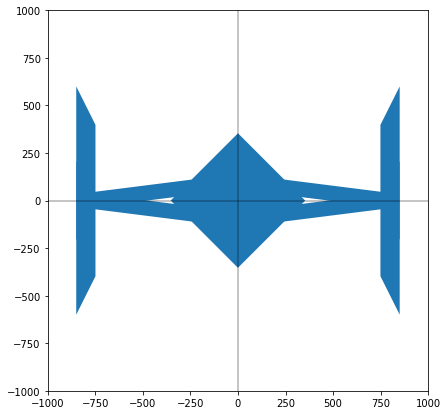

In [ ]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))

# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)

plt.show()